## View Simulation

Produce an animation of the stage of a simulation (stored in an `sww` file.

Set the scenerio first.

In [78]:
scenerio = 'simple_pressure_cell'
#scenerio = 'simple_wind_stress'
#scenerio = 'simple_pressure_wind'


import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

import anuga

swwplotter = anuga.SWW_plotter(scenerio+'.sww', min_depth = 0.001)

n = len(swwplotter.time)

from tqdm import tqdm

for k in tqdm(range(n)):
  swwplotter.save_stage_frame(frame=k, figsize=(10,6), vmin=-0.1, vmax = 1.0)


100%|███████████████████████████████████████████████████████| 51/51 [00:17<00:00,  2.94it/s]


In [79]:
# Do the animation in a separate cell to get the correct size
swwplotter.make_stage_animation(figsize=(10,6))

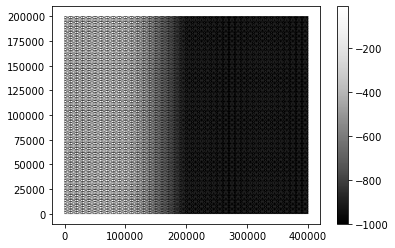

In [80]:
plt.tripcolor(swwplotter.triang, 
              facecolors = swwplotter.elev, 
              edgecolors='k', 
              cmap='Greys_r')
plt.colorbar();

Check maximum of simulation stage in comparison with expected value

In [81]:
from anuga.config import rho_w
from anuga import g
1/(rho_w*g) * 101325 /10, np.max(swwplotter.stage), np.min(swwplotter.stage)

(1.010682865521575, 1.0050751, -0.01012596)